In [1]:
data_path = 'D:\\Download\\IMDB Dataset.csv'

#从文件中读取数据
import pandas as pd

imdb_data = pd.read_csv(data_path)

In [2]:
#查看IMDB数据集的shape和前10条电影评论
print(imdb_data.shape)
imdb_data.head(10)

#imdb_data的键：review和sentiment
print(imdb_data['sentiment'].value_counts())

(50000, 2)
negative    25000
positive    25000
Name: sentiment, dtype: int64


In [3]:
#将imdb_data中的数据存储到labels和texts当中
labels, texts = [], []

for review in imdb_data['review']:
    texts.append(review)
    
for label in imdb_data['sentiment']:
    if label == 'positive':
        labels.append(float(1.0))
    else:
        labels.append(float(0))
        
print('Length of labels', len(labels))
print('Length of texts', len(texts))

Length of labels 50000
Length of texts 50000


划分数据集，在这里首先将数据打乱，再将前15000个数据作为训练，之后的10000个数据用于验证，其余的25000个数据用于测试

In [9]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

tokenizer = Tokenizer(num_words = 10000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens' % len(word_index))

data = pad_sequences(sequences, maxlen = 100)
labels = np.asarray(labels)
print('Shape of data', data.shape)
print('Shape of labels', labels.shape)

indices = np.arange(data.shape[0])
data = data[indices]
labels = labels[indices]

x_train = data[: 15000]
y_train = labels[: 15000]

x_val = data[15000 : 25000]
y_val = labels[15000 : 25000]

x_test = data[25000:]
y_test = labels[25000:]

Found 124252 unique tokens
Shape of data (50000, 100)
Shape of labels (50000,)


In [5]:
print(x_train.shape, y_train.shape)

(15000, 100) (15000,)


In [7]:
#在IMDB数据上使用Embedding层和分类器
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model_fc = Sequential()
model_fc.add(Embedding(10000, 8, input_length=100))
model_fc.add(Flatten())
model_fc.add(Dense(1, activation='sigmoid'))

model_fc.summary()

model_fc.compile('rmsprop', 'binary_crossentropy', 'accuracy')

history_fc = model_fc.fit(x_train, y_train,
                          epochs=10,
                          batch_size=32,
                          validation_data=(x_val, y_val))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 8)            80000     
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 801       
                                                                 
Total params: 80,801
Trainable params: 80,801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 1s 1ms/step - loss: 0.6406 - accuracy: 0.6663 - val_loss: 0.5242 - val_accuracy: 0.7921
Epoch 2/10
469/469 [==============================] - 0s 1ms/step - loss: 0.4059 - accuracy: 0.8409 - val_loss: 0.3731 - val_accuracy: 0.8426
Epoch 3/10
469/469 [==========

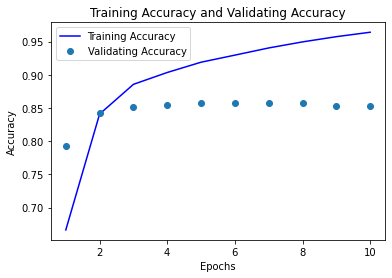

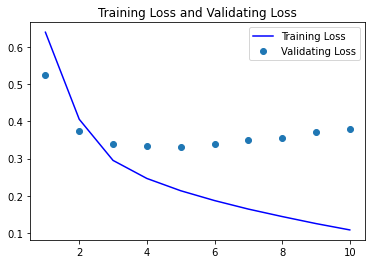

In [11]:
#绘制验证的结果
import matplotlib.pyplot as plt

acc = history_fc.history['accuracy']
val_acc = history_fc.history['val_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label = "Training Accuracy")
plt.plot(epochs, val_acc, 'o', label = "Validating Accuracy")
plt.title("Training Accuracy and Validating Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

#2、训练损失和验证损失
loss = history_fc.history['loss']
val_loss = history_fc.history['val_loss']

plt.plot(epochs, loss, 'b', label = "Training Loss")
plt.plot(epochs, val_loss, 'o', label = "Validating Loss")
plt.title("Training Loss and Validating Loss")
plt.legend()

plt.show()

In [10]:
#在测试集上进行验证
test_loss, test_acc = model_fc.evaluate(x_test, y_test)
print('Test loss', test_loss)
print('Test Accuracy', test_acc)

782/782 [==============================] - 0s 432us/step - loss: 0.3682 - accuracy: 0.8527
Test loss 0.36823850870132446
Test Accuracy 0.8527200222015381
